#### 0-1. 데이터 준비하기
- to_numpy() 메서드
- unique() 함수

In [1]:
import pandas as pd

In [2]:
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [4]:
fish['Weight']    # 배열

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [5]:
fish[['Weight']]    # 데이터프레임으로 만들기

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


In [6]:
fish_input = fish[[	'Weight',	'Length',	'Diagonal',	'Height',	'Width']].to_numpy()    # to_numpy() : 데이터프레임을 넘파이 배열로 변환
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [7]:
pd.unique(fish['Species'])    # unique() : 시리즈객체의 고유값을 넘파이 배열로 변환

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [8]:
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


#### 0-2. 데이터 준비하기
- train_test_split() 함수
>train_test_split는 랜덤으로 데이터를 분리하므로 train_test_split를 설정하지 않으면 수행할 때마다 다른 학습/테스트 데이터 세트가 생성된다. 따라서 random_state를 설정하여 수행 시 결과값을 동일하게 맞춰준다.
- StandardScaler 클래스

In [9]:
from sklearn.model_selection import train_test_split    # 훈련/테스트 세트 표준화 전처리
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [10]:
train_input.shape, test_input.shape   # 5개의 특성

((119, 5), (40, 5))

In [11]:
from sklearn.preprocessing import StandardScaler    # 데이터 특성의 스케일 표준화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### 0-3. K-최근접 이웃 분류기의 확률 예측
kNeighborsClassifier 클래스
- n_neighbors: 최근접 이웃
- classes_ 속성
- predict() 메서드
- predict_proba() 메서드

In [12]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [13]:
train_target[:5]

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki'], dtype=object)

In [14]:
print(kn.classes_)    # classes_ : 문자열 타깃값을 사이깃런 모델에 전달하면 알파벳 순으로 정렬되어 저장된다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [15]:
kn.predict(test_scaled[:5])   # predict() 메서드 : 입력 샘플 예측값 반환

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [16]:
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [17]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])   # predict_proba() 메서드 : 확률 반환
print(np.round(proba, decimals=4))    # round() 함수 : 반올림으로 반환. decimals는 소수점 아래자릿수 표시
# 샘플 5개. 순서대로 클래스('Species')에 대한 확률 표시

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [18]:
print(kn.classes_)    # 위 확률 비교

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [19]:
# 위 모델의 계산한 확률이 최근접 이웃 비율로 계산한 것인지 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])    # 네번쨰 샘플 슬라이싱 선택 후 이웃 구하기
print(train_target[indexes])    # Perch일 확률 2/3, Roach일 확률 1/3 -> Perch로 예측
# 이차원 배열로 출력( kneighbors() 때문 )

[['Roach' 'Perch' 'Perch']]


그런데 확률이라고 하기엔 가능한 확률값이 0/3, 1/3, 2/3, 3/3이 끝임.
<br>
더 좋은 확률 계산법은 없을까?

#### 1. 로지스틱 회귀
선형 방정식을 학습하는 분류 알고리즘
- 훈련 데이터에 최적화된 계수(가중치), 절편을 학습
- 함수 활용하여 클래스 예측 확률 출력 (측정할 수 있는 범위로 만들어줌)
- 시그모이드 함수, 소프트맥스 함수 사용

#### 2. 시그모이그 함수 sigmoid fn
z가 무한히 작은 음수 = 0<br>
z가 무한히 큰 음수 = 1<br>
z가 0 = 0.5<br>

In [20]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)   # z의 범위 : -5 ~ 5
print(z)

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

In [21]:
phi = 1 / (1 + np.exp(-z))    # phi의 범위 : 0 ~ 1
phi

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

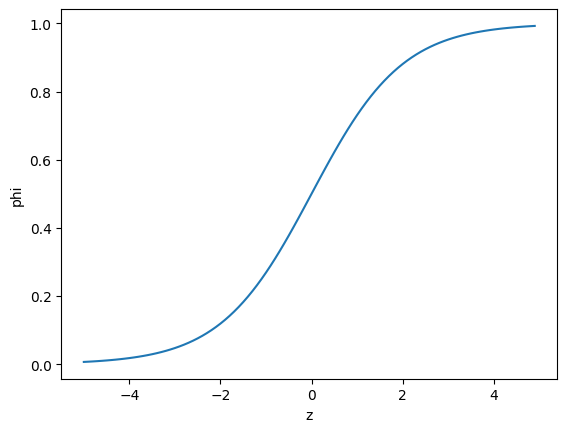

In [22]:
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### 3. 로지스틱 회귀로 이진분류 수행
도미 빙어 샘플 골라내기
- boolean 인덱싱 : True, False 배열의 일부를 인덱싱

In [23]:
char_a = np.array(['A', 'B', 'C', 'D', 'C'])
char_a[[True, False, True, False, False]]

array(['A', 'C'], dtype='<U1')

In [24]:
char_a == 'C'

array([False, False,  True, False,  True])

In [25]:
char_a[char_a == 'C']

array(['C', 'C'], dtype='<U1')

In [26]:
a = np.array([1, 2, 3, 4, 3])
a[[True, False, False, False, False]]

array([1])

In [27]:
a[a == 3]

array([3, 3])

In [28]:
a == 3

array([False, False,  True, False,  True])

In [29]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')   # 도미 = 0(negative class) , 빙어 = 1(positive class) -> 이진분류
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [30]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
train_bream_smelt.shape

(33, 5)

In [31]:
target_bream_smelt = train_target[bream_smelt_indexes]
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

LogisticRegression 클래스:
- fit( ) 메서드
- predict( ) 메서드
- predict_proba( )  : 음성 클래스와 양성 클래스에 대한 예측 확률
- classes_ 속성
- coef_, intercept_ 속성 : 선형 방정식의 계수와 절편
- decision_function( ) 메서드 : 양성 클래스(클래스[1]의 확률)에 대한 선형 식의 함수 값 반환

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [33]:
train_bream_smelt[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174]])

In [34]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [35]:
print(lr.predict_proba(train_bream_smelt[:5]))    # [bream 확률, smelt 확률] 출력

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [36]:
print(lr.classes_)

['Bream' 'Smelt']


In [37]:
print(lr.coef_)   # 가중치
print(lr.intercept_)    # 절편

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]]
[-2.16155132]


In [38]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [39]:
# 시그모이드 값 계산
from scipy.special import expit
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [40]:
# 시그모이드 값 계산2
1 / (1 + np.exp(-decisions))

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

#### 4. 로지스틱 회귀로 다중분류 수행
- C=1 : L2 규제(= Lidge 규제)의 강도 : 값이 클수록 규제 완화
- max_iter = 100 : 데이터셋 훈련 횟수
- predict_proba( ) 메서드

In [41]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target), lr.score(test_scaled, test_target))

0.9327731092436975 0.925


In [42]:
lr.predict(train_scaled[:5])

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki'], dtype=object)

In [43]:
proba = lr.predict_proba(train_scaled[:5])    # 예측 확률 계
print(np.round(proba, decimals=3))

[[0.998 0.001 0.    0.    0.    0.    0.002]
 [0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.    0.002 0.051 0.    0.006 0.941 0.   ]
 [0.    0.001 0.86  0.001 0.135 0.    0.004]
 [0.009 0.783 0.007 0.    0.187 0.    0.014]]


In [44]:
print(lr.coef_)   # 다중분류에서는 선형 방정식이 클래스 수만큼 만들어짐

[[-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797]
 [ 0.19618191 -2.01072007 -3.77974344  6.50492519 -1.99481478]
 [ 3.562807    6.34355461 -8.48969786 -5.75757213  3.79306162]
 [-0.10458363  3.60320663  3.93067948 -3.61740078 -1.7506979 ]
 [-1.40060998 -6.0750259   5.25969918 -0.87219289  1.86043812]
 [-1.38528461  1.49213609  1.39225441 -5.67734711 -4.40097409]
 [ 0.6215019  -2.32405484 -0.9066217   1.71600589  3.69369499]]


In [45]:
print(lr.intercept_)

[-0.09204689 -0.26289902  3.25100925 -0.14740759  2.65498221 -6.78787045
  1.38423249]


In [46]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [47]:
print(lr.coef_.shape, lr.intercept_.shape)    # 7개의 선형 식이 만들어짐

(7, 5) (7,)


#### 5. 소프트맥스 함수 softmax fn
LogisticRegression 클래스:
- decision_function( ) 메서드

In [48]:
# 이진분류의 테스트 세트 샘플 가져오기
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [49]:
from scipy.special import softmax   # 소프트맥스 해주기(전체 합을 1로 만들어주기)

proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
